In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk

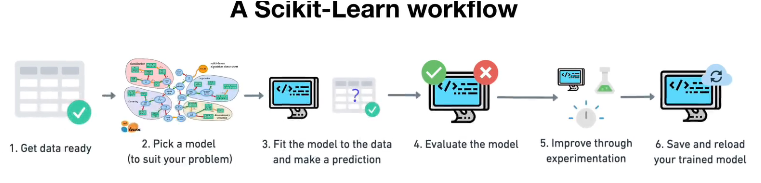

In [365]:
#scikit learn(sklearn) workflow
from IPython.display import Image 
Image(filename=r"C:\Users\Lucky Prem\OneDrive\Desktop\Screenshot 2025-01-21 221727.png", width=900, height=700)

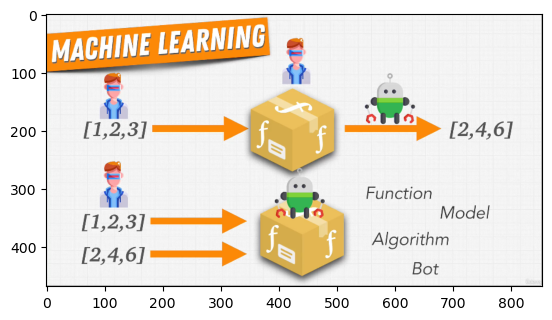

In [366]:
img= plt.imread('Images/ml.png')
plt.imshow(img);

In [367]:
#1 Get data ready
df= pd.read_csv(r"C:\Users\Lucky Prem\Downloads\organizations-100\heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


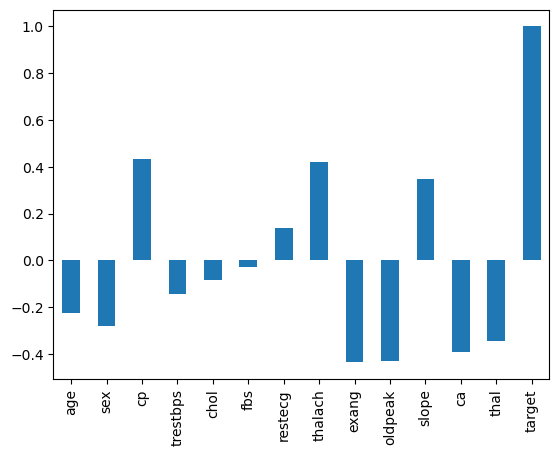

In [369]:
df.corr()['target'].plot(kind='bar');

In [370]:
#split the data: x= features matrix/feature variables, y= target matrix or labels
x=df.drop(columns=['target', 'fbs'])
y=df['target'] #y=df['target'] it expects 1D array 
y     

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

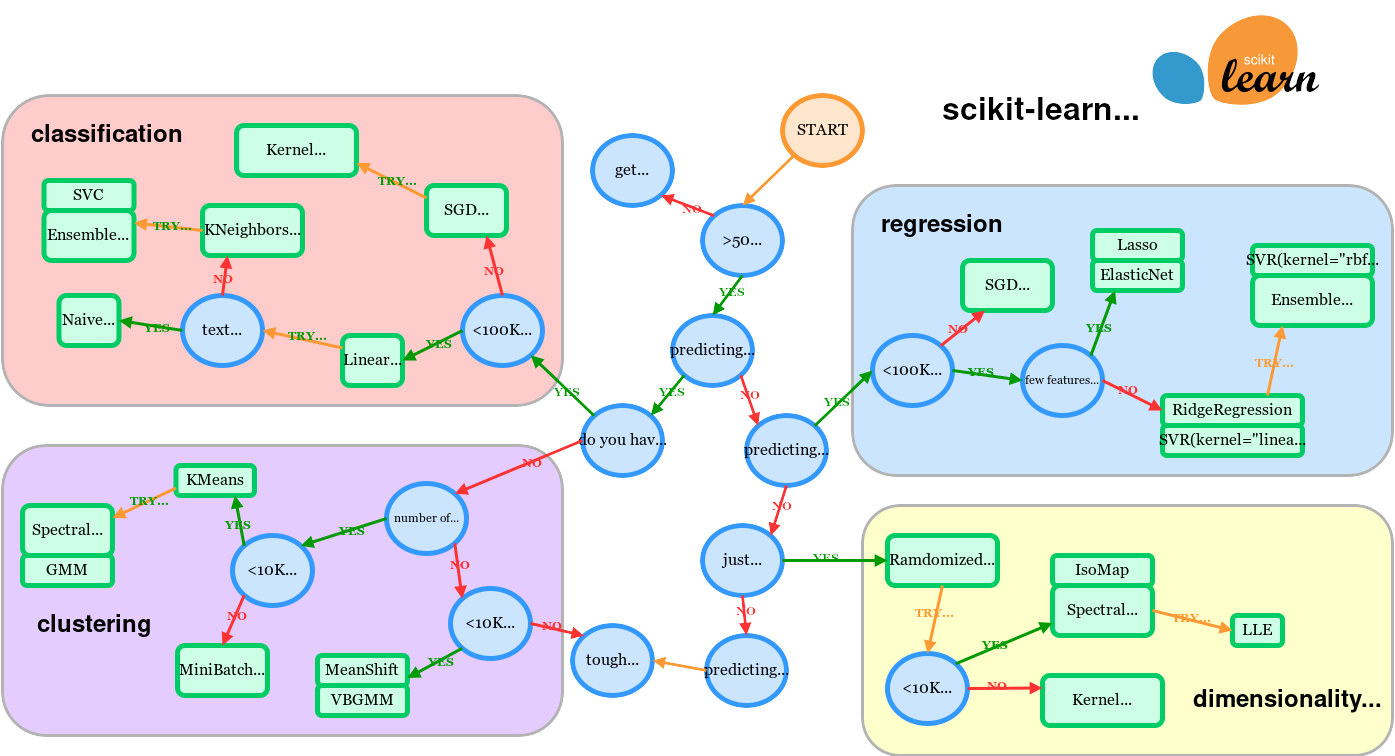

In [371]:
#2 Pick a right model
from IPython.display import Image 
Image(filename=r"C:\Users\Lucky Prem\Downloads\ml_map.png", width=900, height=700)

In [372]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

clf= RandomForestClassifier(n_estimators=10)
reg= LogisticRegression()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [373]:
#3 fit the model to the train data
from sklearn.model_selection import train_test_split
xtr, xt, ytr, yt = train_test_split(x, y, test_size=0.2)
yt

183    0
50     1
99     1
286    0
278    0
      ..
225    0
208    0
114    1
160    1
283    0
Name: target, Length: 61, dtype: int64

In [374]:
clf.fit(xtr, ytr)

RandomForestClassifier(n_estimators=10)

In [375]:
clf.score(xt, yt)

0.8524590163934426

In [376]:
yt_pred= clf.predict(xt) #needs to be on same shape as xtr

In [377]:
yt_pred, np.array(yt)

(array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64),
 array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64))

In [378]:
#4 Evaluate the model on the test data
clf.score(xt, yt)

0.8524590163934426

In [379]:
from sklearn.metrics import classification_report, confusion_matrix 

print(classification_report(yt, yt_pred)) #apply print for better formated result

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        28
           1       0.93      0.79      0.85        33

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [380]:
confusion_matrix(yt, yt_pred)

array([[26,  2],
       [ 7, 26]], dtype=int64)

In [381]:
#Evaluting a model using cross-validation is possible with cross_val_score
from sklearn.model_selection import cross_val_score

cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.83606557, 0.86885246, 0.75409836, 0.8       , 0.78333333])

In [382]:
reg= LogisticRegression(max_iter=900)

In [383]:
cross_val_score(reg, x, y, cv=5)

array([0.80327869, 0.86885246, 0.85245902, 0.85      , 0.75      ])

In [384]:
#5 Improve the model through experimentation/tuning hyperparameters
for i in range(10, 110, 10):
    clf= RandomForestClassifier(n_estimators=i)
    print(i, cross_val_score(clf, x, y, cv=5, scoring=None).mean())

10 0.8049726775956284
20 0.8184699453551912
30 0.8250819672131147
40 0.8216393442622951
50 0.8282513661202187
60 0.8183606557377049
70 0.828360655737705
80 0.821639344262295
90 0.8182513661202184
100 0.8149180327868851


In [385]:
clf=RandomForestClassifier(n_estimators=70)
clf.fit(xtr, ytr)
clf.score(xt,yt)

0.8688524590163934

In [386]:
#6 save and reload our trained model

In [389]:
import pickle
pickle.dump(clf, open('clf_1.pkl', 'wb')) #wb= write binary

In [391]:
load_model= pickle.load(open('clf_1.pkl', 'rb')) #wb= write binary
load_model

RandomForestClassifier(n_estimators=70)